# Homework 1. Такидзе Илья
* Домашку присылать в виде `.pdf` файла на адрес `homework@merkulov.top`. 
* Дедлайн: **28 марта 22:59**.
* Есть несколько способов конвертировать `.ipynb` в `.pdf`. Самый простой - сохранить ноутбук как `.html`, а затем распечатать это в `.pdf` файл, нажав `ctrl + P` в браузере. 
* Займитесь этим вопросом заранее, чтобы в последний момент не получить из за этого 0 баллов. 
* Все ячейки должны быть запущены, а графики построены.
## Sequence convergence
### Problem 1
Определить скорость сходимости следующих последовательностей:

1. $r_k = \left\{ (0.707)^k \right\}_{k=1}^\infty$
2. $r_k = \left\{ (0.707)^{2^k} \right\}_{k=1}^\infty$
3. $r_k = \left\{ \dfrac{1}{k^2} \right\}_{k=1}^\infty$
4. $r_k = \left\{ \dfrac{1}{k!} \right\}_{k=1}^\infty$
5. $r_k =\begin{cases} \frac{1}{k}, & \mbox{if } k\mbox{ is even} \\ \frac{1}{k^2}, & \mbox{if } k\mbox{ is odd} \end{cases}$
6. $r_k =\begin{cases} \frac{1}{k^k}, & \mbox{if } k\mbox{ is even} \\ \frac{1}{k^{2k}}, & \mbox{if } k\mbox{ is odd} \end{cases}$

#### РЕШЕНИЕ:
1. линейная сходимость с коэффициентом $\alpha = 0.707$
2. квадратичная сходимость с коэффициентом $\alpha = 0.707$
3. сублинейная сходимость с коэффициентом $\alpha \rightarrow 1$
4. сверхлинейная сходимость, т.к. $\alpha \rightarrow 0$
5. 

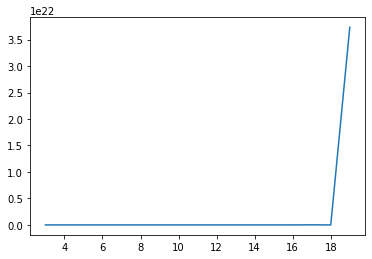

In [5]:
import math
import matplotlib.pyplot as plt
import numpy as np


k = np.arange(3. , 20. )
def x(k):
    rk = 0
    if int(k)%2 == 0:
        rk = 1/k**k
    else:
        rk = 1/k**(2*k)
    return rk 
#def q(k):
    #return math.log(((x(k+1) - x(k))/(x(k) - x(k-1)))/((x(k) - x(k-1))/(x(k-1) - x(k-2))))
def q(k):
    return x(k + 1.0)/x(k) 
qe = np.zeros(len(k))
ki = np.zeros(len(k))
for i in range(len(k)):
    ki[i] = k[i]
    qe[i] = q(k[i])

plt.plot(ki, qe)
plt.show()



## Line search

### Problem 2
Рассмотрите функцию $f(x) = x \cdot e^x + \sin e^x, \;\;\; x \in [-20, 0]$ . Рассмотрите методы локализации решения, при которых отрезок $[a,b]$ делится на 2 части в фиксированной пропорции $t: x_t = a + t*(b-a)$ (максимум дважды на итерации - как в методе дихотомии).

Проведите эксперименты при различных значениях $t \in [0,1]$ и постройте график зависимости $N (t)$ - значения количества итераций, необходимых для достижения $\varepsilon$ - точности от параметра $t$. 
Считать $\varepsilon = 10^{-7}$.

Обратите внимание, что в случае $t = 0.5$ данный метод точно совпадает с методом дихотомии.

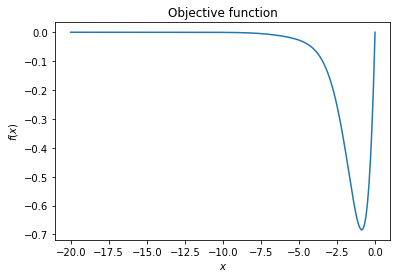

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

def f_2(x):
    return (x + np.sin(x))*np.exp(x)

x = np.linspace(-20,0, 200)
plt.plot(x, f_2(x))
plt.title('Objective function')
plt.xlabel(f'$x$')
plt.ylabel(f'$f(x)$')
plt.show()

In [26]:
import math
t = 0.4
a = -20.
b = 0.
eps = 10**(-7) #критерий остановки
def xt(a, b, t):  #середина отрезка
    return a + t*(b - a)
def xl(a, b, t):  #середина левого отрезка отрезка
    return a + t*(xt(a, b, t) - a)
def xr(a, b, t):  #середина правого отрезка отрезка
    return xt(a, b, t) + t*(b - xt(a, b ,t))
def minimize(f, a, b, t):
    a1 = 0
    b1 = 0
    if math.fabs(a - b) > eps:
        if f(xl(a, b, t)) < f(xr(a, b, t)):
            b1 = xt(a, b, t)
            minimize(f, a, b1, t)
        else:
            a1 = xt(a, b, t)
            minimize(f, a1, b, t)
    print(a1 ,b1)
    return 0
        
print(minimize(f_2, a, b, t))
#print(f_2(-20))

0 0
0 -0.8743578257927421
-0.874357902467942 0
-0.8743580302599417 0
-0.874358243246608 0
0 -0.8743577107799424
0 -0.8743563796132784
-0.8743585982243851 0
0 -0.8743530516966183
-0.874362295909563 0
-0.8743777029311376 0
0 -0.8743391853772011
0 -0.87424289149236
0 -0.8740021567802571
-0.8744033813004286 0
-0.8750720888340477 0
-0.8761866013900798 0
-0.8780441223167997 0
-0.8811399905279997 0
-0.8862997708799998 0
-0.8948994047999997 0
-0.9092321279999998 0
0 -0.8734003199999998
0 -0.7838207999999998
0 -0.5598719999999998
-0.9331199999999997 0
-1.5551999999999997 0
-2.5919999999999996 0
-4.319999999999999 0
-7.199999999999999 0
-12.0 0
0


## Zero order methods

### Problem 3
Давайте располагать базовые станции беспроводной сети оптимально!
Пусть у вас есть $N_{obj} = 10$ кластеров из 10 абонентов каждый. Давайте с помощью генетического алгоритма постепенно искать оптимальное количество и расположение базовых станций, чтобы минимизировать стоимость расстановки таких станций.

Ниже представлен один из возможных вариантов реализации генетического алгоритма.

#### Популяция
Это список из массивов размера `[N_stations x 2]`. Каждая особь при этом представляет собой набор координат станций на плоскости. Генерация случайного

#### Мутация
Определяется функцией `mutation()`. Из всех особей выбирается `mutation_rate` часть и к `mutation_rate` части её станций прибавляется случайный Гауссов шум. 
После этого к популяции добавляется особь со случайным количеством станций со случайными координатами.

#### Скрещивание
Определяется функциями `children_creation()` и `breed()`. Двум наборам станций ставится в соответствие третяя станция, из которой взяты четные станции одного родителя и нечетные станции другого.

#### Оценка стоимости особи
Определяется функцией `evaluate_generation()`. Итоговая стоимость, соответствующая конкретной особи складывается из себестоимости построения базовых станций (каждая стоит `station_cost`) за вычетом прибыли от каждого клиента. Прибыль от каждого клиента обратна пропорциональна расстоянию до "своей" базовой станции. Каждый клиент присоединяется только к одной (ближайшей) базовой станции с помощью функции `find_nearest_station()`. Кроме того, прибыль от каждого абонента обратно пропорциональна числу абонентов на данной базовой станции (у каждой станции есть число подсоединенных к ней абонентов `stations_load`). Заметим так же, что, начиная с некоторой близости к абонента к базовой станции, прибыль клиента перестает расти ( в нашем алгоритме она одинакова в радиусе `0.1` от базовой станции, после чего линейно убывает).

Ваша задача состоит в том, чтобы придумать любые модификации к предложенным процедурам в рамках генетического алгоритма так, чтобы итоговое качество работы алгоритма было лучше. Предложите, опишите и протестируйте идеи улучшения алгоритма.

In [27]:
%matplotlib notebook

import numpy as np
from scipy.spatial.distance import cdist
from random import shuffle, sample
from copy import deepcopy
import random
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from IPython.display import clear_output
import matplotlib.pyplot as plt

def generate_problem(N_obj, N_abon_per_cluster):
    abonents = np.zeros((N_obj*N_abon_per_cluster,2))
    for i_obj in range(N_obj):
        center = np.random.random(2)
        cov    = np.random.random((2,2))*0.1
        cov    = cov @ cov.T
        xs, ys = np.random.multivariate_normal(center, cov, N_abon_per_cluster).T
        abonents[i_obj*N_abon_per_cluster:(i_obj+1)*N_abon_per_cluster, 0] = xs
        abonents[i_obj*N_abon_per_cluster:(i_obj+1)*N_abon_per_cluster, 1] = ys
    return abonents

def plot_problem(abonents):
    plt.figure(figsize=(10,6))
    plt.plot(abonents[:,0], abonents[:,1], 'go')
    plt.title('The village')
#     plt.savefig('bs_problem.svg')
    plt.show()
    
def random_solution(abonents, N_solutions = 100):
    x_min, x_max = abonents[:,0].min(), abonents[:,0].max()
    y_min, y_max = abonents[:,1].min(), abonents[:,1].max()
    population = []
    
    for i_sol in range(N_solutions):
        N_stations = int(np.random.random(1)[0]*10)+1
        stations = np.zeros((N_stations,2))
        stations[:,0], stations[:,1] = np.random.random(N_stations)*(x_max - x_min), np.random.random(N_stations)*(y_max - y_min)
        population.append(stations)
    return population
    
def find_nearest_station(dist_matrix):
    return np.argmin(dist_matrix, axis=1)

def pairwise_distance(abonents, stations):
    return cdist(abonents, stations)
    
def evaluate_generation(abonents, population, station_cost = 1, abonent_profit_base = 1):  
    costs = []
    for creature in population:
        N_stations, N_users = len(creature), len(abonents)
        total_cost          = N_stations*station_cost
        dist_matrix         = pairwise_distance(abonents, creature)
        stations_assignment = find_nearest_station(dist_matrix)
        stations_load       = np.ones(N_stations)
        stations_load       = np.array([1/(sum(stations_assignment == i_st)+1) for i_st, st in enumerate(stations_load)])
        
        for i_ab, abonent in enumerate(abonents):
            dist_to_base = dist_matrix[i_ab, stations_assignment[i_ab]]
            total_cost  -= stations_load[stations_assignment[i_ab]]*abonent_profit_base/(max(0.1, dist_to_base))
        
        costs.append(total_cost)
    return np.array(costs)

def mutation(population, mutation_rate = 0.3):
    N_creatures = len(population)
    x_min, x_max = -1, 1
    y_min, y_max = -1, 1
    mutated_creatures = sample(range(N_creatures), int(mutation_rate*N_creatures))
    for i_mut in mutated_creatures:
        N_stations = len(population[i_mut])
        mutated_stations = sample(range(N_stations), int(mutation_rate*N_stations))
        for i_st_mut in mutated_stations:
            population[i_mut][i_st_mut] += np.random.normal(0, 0.01, 2)
    
    N_new_stations = max(1, int(random.random()*mutation_rate*N_creatures))
    for i in range(N_new_stations):
        new_stations = np.zeros((N_new_stations,2))
        new_stations[:,0], new_stations[:,1] = np.random.random(N_new_stations)*(x_max - x_min), np.random.random(N_new_stations)*(y_max - y_min)
        population.append(new_stations)
    return population

def children_creation(parent1, parent2):
    # whoisbatya
    batya = random.random() > 0.5
    if batya:
        child = np.concatenate((parent1[::2], parent2[1::2]))
    else:
        child = np.concatenate((parent1[1::2], parent2[::2]))
    return np.array(child)

def breed(population):
    new_population = deepcopy(population)
    random.shuffle(new_population)
    N_creatures = len(population)
    for i in range(N_creatures//2):
        children = children_creation(population[i], population[i+1])
        new_population.append(children)
    return new_population

def selection(abonents, population, offsprings = 10):
    scores = evaluate_generation(abonents, population)
    best = np.array(scores).argsort()[:offsprings].tolist()
    return [population[i_b] for i_b in best], population[best[0]] 


def let_eat_bee(N_creatures, N_generations, N_obj = 10, N_abon_per_cluster = 10):
    abonents = generate_problem(N_obj, N_abon_per_cluster)
    
    costs_evolution = np.zeros((N_generations, N_creatures))
    population = random_solution(abonents, N_creatures)
    best_creatures = []
    for generation in range(N_generations):
        population                = mutation(population)
        population                = breed(population)
        population, best_creature = selection(abonents, population, N_creatures)
        best_creatures.append(best_creature)
        
        costs_evolution[generation, :] = evaluate_generation(abonents, population)
        
        # Plotting
        x_min, x_max = 0, 1
        y_min, y_max = 0,1
        cost_min  = [np.min(costs_evolution[i])  for i in range(generation)]
        cost_max  = [np.max(costs_evolution[i])  for i in range(generation)]
        cost_mean = [np.mean(costs_evolution[i]) for i in range(generation)]

        fig = make_subplots(rows=1, cols=2, subplot_titles=("Topology of the best solution", "Cost function"))
        fig.update_xaxes(title_text="x", range = [x_min,x_max],  row=1, col=1)
        fig.update_yaxes(title_text="y", range = [y_min,y_max], row=1, col=1)
        fig.update_yaxes(title_text="Total cost", row=1, col=2)
        fig.update_xaxes(title_text="Generation", row=1, col=2)
    
        fig.add_trace(
            go.Scatter(x=abonents[:, 0], y=abonents[:, 1], mode='markers', name='abonents',  marker=dict(size=5)),
            row=1, col=1
        )

        fig.add_trace(
            go.Scatter(x=best_creatures[generation][:, 0], y=best_creatures[generation][:, 1], mode='markers', name='stations', marker=dict(size=15)),
            row=1, col=1
        )

        fig.add_trace(
            go.Scatter(x = list(range(generation)), y = cost_min, name='best'),
            row=1, col=2
        )

        fig.add_trace(
            go.Scatter(x = list(range(generation)), y = cost_max, name='worst'),
            row=1, col=2
        )

        fig.add_trace(
            go.Scatter(x = list(range(generation)), y = cost_mean, name='mean'),
            row=1, col=2
        )

        clear_output(wait=True)
        fig.show()
        
    fig.write_html("test.html")    
    return costs_evolution, abonents, best_creatures


costs_evolution, abonents, best_creatures = let_eat_bee(200, 200)

KeyboardInterrupt: 

Для демонстрации работы покажите запуск на 200 особях в течение 200 поколений

---

#### Предлагемые изменения

* 1
* 2

#### Было
![картинка запуска дефолтной работы алгоритма](./was.png)
#### Стало
![картинка запуска работы предложенного алгоритма на тех же abonents]()


Обратите внимание, что, изменяя стоиомость постройки станций и дефолтную прибыль от абонента можно прийти к странным экстремальным решениям (например, у каждого абонента по базовой станции). Поэтому фокусируйтесь больше на левую часть картинки и на ощущение того, что предложенное решение - норм.

## Gradient descent

### Problem 4
Говорят, что функция принадлежит классу $f \in C^{k,p}_L (Q)$, если она $k$ раз непрерывно дифференцируема на $Q$, а $p$-ая производная имеет константу Липшица $L$. 

$$
\|\nabla^p f(x) - \nabla^p f(y)\| \leq L \|x-y\|, \qquad \forall x,y \in Q
$$

Чаще всего используются $C_L^{1,1}, C_L^{2,2}$ на $\mathbb{R}^n$. 
Заметим, что:
* $p \leq k$
* Если $q \geq k$, то $C_L^{q,p} \subseteq C_L^{k,p}$. Чем выше порядок производной, тем сильнее ограничение (меньшее количество функций принадлежат классу)

Докажите, что функция принадлежит к классу $C_L^{2,1} \subseteq C_L^{1,1}$ тогда и только тогда, когда $\forall x \in \mathbb{R}^n$:
$$
\|\nabla^2 f(x)\| \leq L
$$

Докажите так же, что последнее условие можно без ограничения общности переписать в виде:

$$
-L I_n \preceq \nabla^2 f(x) \preceq L I_n
$$

Примечание: по умолчанию для векторов используется Евклидова норма, а для матриц - спектральная

РЕШЕНИЕ ЗДЕСЬ

### Problem 5
Покажите, что с помощью следующих стратегий подбора шага в градиентному спуске:
* Постоянный шаг $h_k = \dfrac{1}{L}$
* Убывающая последовательность $h_k = \dfrac{\alpha_k}{L}, \quad \alpha_k \to 0$

можно получить оценку убывания функции на итерации вида:

$$
f(x_k) - f(x_{k+1}) \geq \dfrac{\omega}{L}\|\nabla f(x_k)\|^2
$$
$\omega > 0$ - некоторая константа, $L$ - константа Липщица градиента функции 

### Problem 6
Рассмотрим функцию двух переменных:

$$
f(x_1, x_2) = x_1^2 + k x_2^2,
$$

где $k$ - некоторый параметр

In [5]:
def f_6(x, *f_params):
    if len(f_params) == 0:
        k = 2
    else:
        k = f_params
    x_1, x_2 = x
    return x_1**2 + k*x_2**2

def df_6(x, *f_params):
    if len(f_params) == 0:
        k = 2
    else:
        k = f_params
    return np.array([2*x[0], 2*k*x[1]])

In [6]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

def plot_3d_function(x1, x2, f, title, *f_params, minima = None, iterations = None):
    '''
    '''
    low_lim_1 = x1.min()
    low_lim_2 = x2.min()
    up_lim_1  = x1.max()
    up_lim_2  = x2.max()

    X1,X2 = np.meshgrid(x1, x2) # grid of point
    Z = f((X1, X2), *f_params) # evaluation of the function on the grid
    
    # set up a figure twice as wide as it is tall
    fig = plt.figure(figsize=(16,7))
    fig.suptitle(title)

    #===============
    #  First subplot
    #===============
    # set up the axes for the first plot
    ax = fig.add_subplot(1, 2, 1, projection='3d')

    # plot a 3D surface like in the example mplot3d/surface3d_demo
    surf = ax.plot_surface(X1, X2, Z, rstride=1, cstride=1, 
                          cmap=cm.RdBu,linewidth=0, antialiased=False)

    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    if minima is not None:
        minima_ = np.array(minima).reshape(-1, 1)
        ax.plot(*minima_, f(minima_), 'r*', markersize=10)
    
    

    #===============
    # Second subplot
    #===============
    # set up the axes for the second plot
    ax = fig.add_subplot(1, 2, 2)

    # plot a 3D wireframe like in the example mplot3d/wire3d_demo
    im = ax.imshow(Z,cmap=plt.cm.RdBu,  extent=[low_lim_1, up_lim_1, low_lim_2, up_lim_2])
    cset = ax.contour(x1, x2,Z,linewidths=2,cmap=plt.cm.Set2)
    ax.clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
    fig.colorbar(im)
    ax.set_xlabel(f'$x_1$')
    ax.set_ylabel(f'$x_2$')
    
    if minima is not None:
        minima_ = np.array(minima).reshape(-1, 1)
        ax.plot(*minima_, 'r*', markersize=10)
    
    if iterations is not None:
        for point in iterations:
            ax.plot(*point, 'go', markersize=3)
        iterations = np.array(iterations).T
        ax.quiver(iterations[0,:-1], iterations[1,:-1], iterations[0,1:]-iterations[0,:-1], iterations[1,1:]-iterations[1,:-1], scale_units='xy', angles='xy', scale=1, color='blue')

    plt.show()

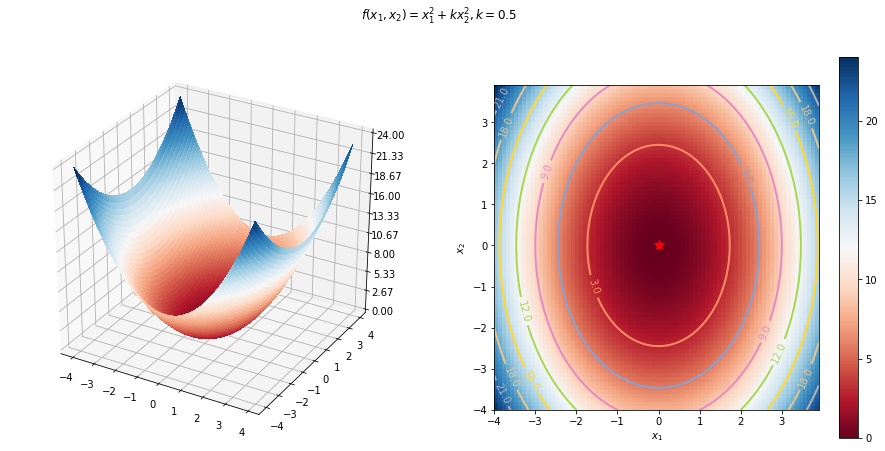

In [7]:
up_lim  = 4
low_lim = -up_lim
x1 = np.arange(low_lim, up_lim, 0.1)
x2 = np.arange(low_lim, up_lim, 0.1)
k=0.5
title = f'$f(x_1, x_2) = x_1^2 + k x_2^2, k = {k}$'

plot_3d_function(x1, x2, f_6, title, k, minima=[0,0])

Для наглядности можете пользоваться кодом отрисовки окружающих картинок

Finished with 20 iterations


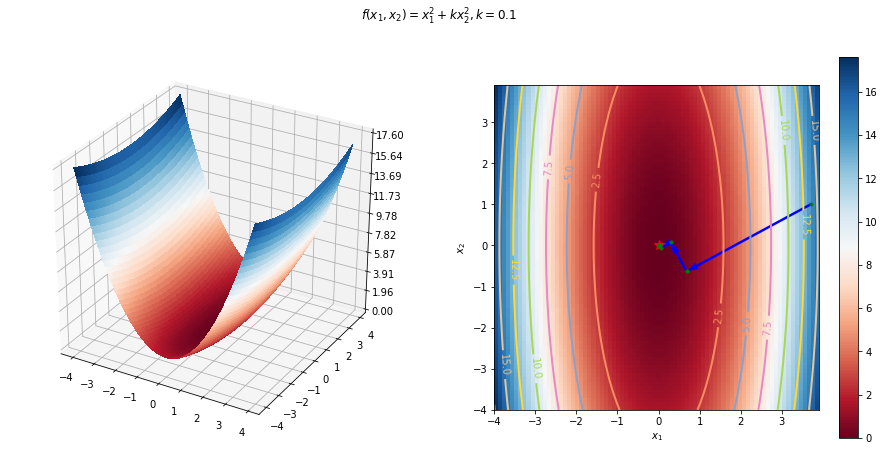

In [8]:
from scipy.optimize import minimize_scalar

def steepest_descent(x_0, f, df, df_eps = 1e-2, max_iter = 1000):
    iterations = []
    x = np.array(x_0)
    iterations.append(x)
    while np.linalg.norm(df(x)) > df_eps and len(iterations) <= max_iter:
        res = minimize_scalar(lambda alpha: f(x - alpha * df(x)))
        alpha_opt = res.x
        x = x - alpha_opt * df(x)
        iterations.append(x)
    print(f'Finished with {len(iterations)} iterations')
    return iterations

x_0 = [3.7,1]
iterations = steepest_descent(x_0, f_6, df_6, df_eps = 1e-9)
k = 0.1
title = f'$f(x_1, x_2) = x_1^2 + k x_2^2, k = {k}$'

plot_3d_function(x1, x2, f_6, title, k, minima=[0,0], iterations = iterations)

Постройте график количества итераций, необходимых для сходимости алгоритма наискорейшего спуска (до выполнения условия $\|\nabla f(x_k)\| \leq \varepsilon = 10^{-7}$) в зависимости от значения $k$. Рассмотрите интервал $k \in [10^{-3}; 10^3]$ (будет удобно использовать функцию `ks = np.logspace(-3,3)`) и строить график по оси абсцисс в логарифмическом масштабе `plt.semilogx()` или `plt.loglog()` для двойного лог. масштаба.

Сделайте те же графики для функции:

$$
f(x) = \ln(1 + e^{x^\top A x}) + \mathbf{1}^\top x
$$

Объясните полученную зависимость.